In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import statsmodels.api as sm
from random import sample
import random
import itertools
from sklearn import preprocessing

#dynamic time warping
from dtw import *

#clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster, ward, dendrogram

from operator import itemgetter
from itertools import combinations

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
import scipy


from tqdm import tqdm

#xgboost gradient boosting
import xgboost as xgb

from itertools import combinations
from pandas.plotting import scatter_matrix

from pprint import pprint

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

import warnings

#import other python files

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 80 from PyObject

In [ ]:
#technical calculations for preprocessing the pandas dataframes

def calc_overload (load_P, load_factor):
    '''Calculates the potential overload of a grid resource.
    Returns the overload power in MW
    param: load_P
    param: load_factor
    return: overload_P'''
    capacity = abs(load_P)/(load_factor/100)
    overload_P = load_P - capacity if load_P > capacity else 0
    return overload_P

def calc_gen_capacity (load_P, load_factor):
    '''Calculates the generation capacity for a generating grid resource.
    Returns the generation power in MW
    param: load_P
    param: load_factor
    return: gen_capacity_P'''
    capacity = load_P/(load_factor/100)
    gen_capacity_P = abs(capacity) if capacity < 0 else 0
    return gen_capacity_P

def calc_gen_overload (load_P, gen_capacity_P):
    '''Calculates the generation overload for a generating grid resource.
    Returns the generation power in MW
    param: load_P
    param: load_factor
    return: gen_overload_P'''
    gen_overload_P = abs(load_P) - gen_capacity_P if load_P < 0 and abs(load_P) > gen_capacity_P else 0
    return gen_overload_P


In [ ]:
#df_emob=pd.read_csv(r"C:\Users\laumen\Time Series Clustering\Datasets\3544_9/EMob_Zeitreihe_nnf_1h.csv",
df_emob=pd.read_csv("gdrive/My Drive/Hiwi Job FGH/Datasets/Datasets - Kopie/3544_9/EMob_Zeitreihe_nnf_1h.csv",
                    sep = ';',
                    engine='python',
                    encoding='latin-1',
                    skiprows = 2)
df_emob['sum_emob']=df_emob.drop('NNF',axis=1).sum(axis=1)


#df_pv=pd.read_csv(r"C:\Users\laumen\Time Series Clustering\Datasets\3544_9/PV_Zeitreihe_nnf_1h.csv",
df_pv=pd.read_csv("gdrive/My Drive/Hiwi Job FGH/Datasets/Datasets - Kopie/3544_9/PV_Zeitreihe_nnf_1h.csv",                  
                    sep = ';',
                    engine='python',
                    encoding='latin-1',
                    skiprows = 2)
df_pv['sum_pv']=df_pv.drop('NNF',axis=1).sum(axis=1)


#df_wea=pd.read_csv(r"C:\Users\laumen\Time Series Clustering\Datasets\3544_9/WEA_nnf_1h.csv",
df_wea=pd.read_csv("gdrive/My Drive/Hiwi Job FGH/Datasets/Datasets - Kopie/3544_9/WEA_nnf_1h.csv",
                    sep = ';',
                    engine='python',
                    encoding='latin-1',
                    skiprows = 2)
df_wea['sum_wea']=df_wea.drop('NNF',axis=1).sum(axis=1)


df_wp=pd.read_csv(r"gdrive/My Drive/Hiwi Job FGH/Datasets/Datasets - Kopie/3544_9/WP_Zeitreihe_nnf.csv",
                    sep = ';',
                    engine='python',
                    encoding='latin-1',
                    skiprows = 2)
df_wp['sum_wp']=df_wp.drop('NNF',axis=1).sum(axis=1)


df_load_GHD=pd.read_csv(r"gdrive/My Drive/Hiwi Job FGH/Datasets/Datasets - Kopie/3544_9/ang_Kunden_GHD_nnf_1h_mm.csv",
                    sep = ';',
                    engine='python',
                    encoding='latin-1',
                    skiprows = 2)
df_load_GHD['load_GHD']=df_load_GHD.drop('Art',axis=1).sum(axis=1)


df_load_HH1=pd.read_csv(r"gdrive/My Drive/Hiwi Job FGH/Datasets/Datasets - Kopie/3544_9/ang_Kunden_HH1_nnf_corrected_1h_mm.csv",
                    sep = ';',
                    engine='python',
                    encoding='latin-1',
                    skiprows = 2)
df_load_HH1['load_HH1']=df_load_HH1.drop('Art',axis=1).sum(axis=1)


df_load_HH2=pd.read_csv(r"gdrive/My Drive/Hiwi Job FGH/Datasets/Datasets - Kopie/3544_9/ang_Kunden_HH2_nnf_corrected_1h_mm.csv",
                    sep = ';',
                    engine='python',
                    encoding='latin-1',
                    skiprows = 2)
df_load_HH2['load_HH2']=df_load_HH2.drop('Art',axis=1).sum(axis=1)


#Concat dataframe with all input information
df_input=pd.concat([df_emob["NNF"],df_emob["sum_emob"],df_pv['sum_pv'],df_wea['sum_wea'],df_wp['sum_wp'],
                    df_load_GHD['load_GHD'],df_load_HH1['load_HH1'],df_load_HH2['load_HH2']],
                   axis=1, 
                   keys=['NNF','sum_emob','sum_PV','sum_wea','sum_wp','load_GHD','load_HH1','load_HH2'])
print(df_input)


       NNF  sum_emob  sum_PV     sum_wea  sum_wp  load_GHD  load_HH1  load_HH2
0        1  0.000000     0.0  106.618584  0.0000  3.265652  0.837657  0.733969
1        2  0.001800     0.0  112.597158  0.1179  3.109238  0.772625  0.670512
2        3  0.004128     0.0  122.462564  0.2520  3.035048  0.646098  0.566025
3        4  0.009348     0.0  121.245855  0.3168  3.172489  0.589040  0.525668
4        5  0.002565     0.0  122.035419  0.2835  3.138206  0.576204  0.509887
...    ...       ...     ...         ...     ...       ...       ...       ...
8755  8756  0.126809     0.0    6.612531  0.3060  3.741125  1.071127  0.952853
8756  8757  0.123949     0.0    6.327013  0.3159  3.688011  1.116116  0.996032
8757  8758  0.121245     0.0    5.917740  0.1503  3.545321  1.073598  0.940151
8758  8759  0.109991     0.0    6.808918  0.1737  3.399865  0.917245  0.807860
8759  8760  0.113915     0.0    6.081924  0.3303  3.340126  0.821365  0.738781

[8760 rows x 8 columns]


In [ ]:
#Generate cyclic time encoding
df_input['time'] = pd.Timestamp('2012-01-01')+pd.to_timedelta(df_input['NNF'], unit='H')
df_input['year']=df_input.time.dt.year
df_input['month']=df_input.time.dt.month
df_input['day']=df_input.time.dt.day
df_input['hour']=df_input.time.dt.hour

#set datetime object as index
df_input = df_input.set_index('time')

#create workhour feature
for i in range(len(df_input)):
    position = df_input.index[i]
    
    hour = position.hour
    
    if (hour > 8.9 and hour < 17):
        df_input.loc[position, 'workhour'] = 1
    else:
        df_input.loc[position, 'workhour'] = 0

#create weekend feature
for i in range(len(df_input)):
    position = df_input.index[i]
    
    weekday = position.weekday()
    
    if (weekday == 5 or weekday == 6):
        df_input.loc[position, 'weekday'] = 1 #Weekend
    else:
        df_input.loc[position, 'weekday'] = 0 #weekday
        
        

#rearrange dataframe
df_input = df_input[['NNF','year','month','day','hour','workhour','weekday','sum_emob',
                    'sum_wea','sum_PV','sum_wp','load_GHD','load_HH1','load_HH2']]


df_input

,NNF,year,month,day,hour,workhour,weekday,sum_emob,sum_wea,sum_PV,sum_wp,load_GHD,load_HH1,load_HH2
time,,,,,,,,,,,,,,
2012-01-01 01:00:00,1,2012,1,1,1,0.0,1.0,0.000000,106.618584,0.0,0.0000,3.265652,0.837657,0.733969
2012-01-01 02:00:00,2,2012,1,1,2,0.0,1.0,0.001800,112.597158,0.0,0.1179,3.109238,0.772625,0.670512
2012-01-01 03:00:00,3,2012,1,1,3,0.0,1.0,0.004128,122.462564,0.0,0.2520,3.035048,0.646098,0.566025
2012-01-01 04:00:00,4,2012,1,1,4,0.0,1.0,0.009348,121.245855,0.0,0.3168,3.172489,0.589040,0.525668
2012-01-01 05:00:00,5,2012,1,1,5,0.0,1.0,0.002565,122.035419,0.0,0.2835,3.138206,0.576204,0.509887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-30 20:00:00,8756,2012,12,30,20,0.0,1.0,0.126809,6.612531,0.0,0.3060,3.741125,1.071127,0.952853
2012-12-30 21:00:00,8757,2012,12,30,21,0.0,1.0,0.123949,6.327013,0.0,0.3159,3.688011,1.116116,0.996032
2012-12-30 22:00:00,8758,2012,12,30,22,0.0,1.0,0.121245,5.917740,0.0,0.1503,3.545321,1.073598,0.940151


In [ ]:
# load dataset and save in pandas dataframe df
# important note: First dataset (erg1: Ausgabe_Zweige) has been preprocessed in excel already, because there were some errors in the csv format of the data.
# That means that the deleting of rows and assigning of headers has already been done.

df=pd.read_csv(r"gdrive/My Drive/Hiwi Job FGH/Datasets/Datasets - Kopie/erg1/Ausgabe_Zweige.csv",
               sep = ';',
               #skiprows=[0,1,3,4,5],
               #header=0,
               dtype = {"id": int, "schluessel": str, "typ": str,"bezeichner": str, "und_anf": float, "bez_so_end":str,"un_end":float, "nnf":int, "p_n0_vor": float,"q_n0_vor": float, "ausl_n0_vor": float, "ausl_n1_vor": float,"ausl_n0_nach":float},
               engine='python',
               encoding="latin-1")



df2=pd.read_csv(r"gdrive/My Drive/Hiwi Job FGH/Datasets/Datasets - Kopie/3544_9/erg2/Ausgabe_Zweige_2.csv",
                sep = ';',
                skiprows=[0,1,3,4,5],
                header=0,
                dtype = {"id": int, "schluessel": str, "typ": str,"bezeichner": str, "und_anf": float, "bez_so_end":str,"un_end":float, "nnf":int, "p_n0_vor": float,"q_n0_vor": float, "ausl_n0_vor": float, "ausl_n1_vor": float,"ausl_n0_nach":float},
                engine='python',
                encoding="latin-1")

#print(df)
#print(df2)

#dataframes merge
frames = [df,df2]
df_all = pd.concat(frames, ignore_index=True)
print(df_all)

#drop useless columns
df_all = df_all.drop(['id','bezeichner','kurzname',
                      'bez_so_anf','ukz_so_anf','un_anf',
                      'ngr_anf','bez_so_end','ukz_so_end',
                      'un_end','ngr_end',df_all.columns[-1]],axis=1)
df_all



# delete duplicates
#df_all = df_all[df_all.duplicated(subset=['schluessel','nnf'], keep=False)]
#print(df_all.duplicated(subset=['schluessel','nnf'], keep=False))






             id  ...              Unnamed: 32
0           300  ...                      NaN
1           305  ...                      NaN
2         33162  ...                      NaN
3         33014  ...                      NaN
4         33542  ...                      NaN
...         ...  ...                      ...
1733455   16324  ...  Engpassbehebungsbereich
1733456   33486  ...  Engpassbehebungsbereich
1733457    8975  ...  Engpassbehebungsbereich
1733458  108130  ...  Engpassbehebungsbereich
1733459  108381  ...  Engpassbehebungsbereich

[1733460 rows x 33 columns]


,schluessel,typ,bez_ss_kn_anf,bez_ss_kn_end,nnf,p_n0_vor,q_n0_vor,ausl_n0_vor,ausl_n1_vor,ausl_n0_nach,ausl_n1_nach,p_n1_vor,p_n0_nach,p_n1_nach,q_n1_vor,q_n0_nach,q_n1_nach,i_n0_vor,i_n1_vor,i_n0_nach,i_n1_nach
0,SO-·Standort_0/T2-Trafo_HSMS,Transformator (2W),1,1,1,49.07176,-0.18297,61.42374,0.0,61.42374,0.0,0.0,49.07176,0.0,0.0,-0.18297,0.0,2837.04080,0.0,2837.04080,0.0
1,SO-·Standort_0/T2-Trafo_HSMS_par,Transformator (2W),1,1,1,49.07176,-0.18297,61.42374,0.0,61.42374,0.0,0.0,49.07176,0.0,0.0,-0.18297,0.0,2837.04080,0.0,2837.04080,0.0
2,L-··L_Knoten_17_Stichabgang_R_Knoten_HSMS_MS·,Leitung,1,1,1,2.26782,-0.00470,40.99390,0.0,40.99390,0.0,0.0,2.26782,0.0,0.0,-0.00470,0.0,130.77055,0.0,130.77055,0.0
3,L-··Knoten_17_Stich·,Leitung,1,1,1,-0.49971,-0.00417,9.03328,0.0,9.03328,0.0,0.0,-0.49971,0.0,0.0,-0.00417,0.0,28.81615,0.0,28.81615,0.0
4,L-··L_65R_39·,Leitung,1,1,1,2.15125,-0.02347,37.98830,0.0,37.98830,0.0,0.0,2.15125,0.0,0.0,-0.02347,0.0,121.18269,0.0,121.18269,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733455,SO-·Standort_49/T2-Trafo_49,Transformator (2W),1,1,8746,0.15452,0.00619,24.49191,0.0,24.49191,0.0,0.0,0.15452,0.0,0.0,0.00619,0.0,8.90846,0.0,8.90846,0.0
1733456,L-··L_36R_36·,Leitung,1,1,8746,0.06870,-0.00461,1.24336,0.0,1.24336,0.0,0.0,0.06870,0.0,0.0,-0.00461,0.0,3.96632,0.0,3.96632,0.0
1733457,SO-·Standort_36/T2-Trafo_36,Transformator (2W),1,1,8746,0.06879,0.00281,27.47913,0.0,27.47913,0.0,0.0,0.06879,0.0,0.0,0.00281,0.0,3.96627,0.0,3.96627,0.0
1733458,L-··L_0R_36_boost·,Leitung,1,1,8746,-0.06825,-0.10819,2.31245,0.0,2.31245,0.0,0.0,-0.06825,0.0,0.0,-0.10819,0.0,7.37672,0.0,7.37672,0.0


In [ ]:
#add overload & generation to df
df_all['overload_P'] = df_all.apply(lambda x: calc_overload(x['p_n0_vor'], x['ausl_n0_vor']),axis=1)
df_all['generation_capacity_P'] = df_all.apply(lambda x: calc_gen_capacity(x['p_n0_vor'], x['ausl_n0_vor']),axis=1)
df_all['generation_overaload_P'] = df_all.apply(lambda x: calc_gen_overload(x['p_n0_vor'], x['generation_capacity_P']),axis=1)


df_all

,schluessel,typ,bez_ss_kn_anf,bez_ss_kn_end,nnf,p_n0_vor,q_n0_vor,ausl_n0_vor,ausl_n1_vor,ausl_n0_nach,ausl_n1_nach,p_n1_vor,p_n0_nach,p_n1_nach,q_n1_vor,q_n0_nach,q_n1_nach,i_n0_vor,i_n1_vor,i_n0_nach,i_n1_nach,overload_P,generation_capacity_P,generation_overaload_P
0,SO-·Standort_0/T2-Trafo_HSMS,Transformator (2W),1,1,1,49.07176,-0.18297,61.42374,0.0,61.42374,0.0,0.0,49.07176,0.0,0.0,-0.18297,0.0,2837.04080,0.0,2837.04080,0.0,0.0,0.000000,0
1,SO-·Standort_0/T2-Trafo_HSMS_par,Transformator (2W),1,1,1,49.07176,-0.18297,61.42374,0.0,61.42374,0.0,0.0,49.07176,0.0,0.0,-0.18297,0.0,2837.04080,0.0,2837.04080,0.0,0.0,0.000000,0
2,L-··L_Knoten_17_Stichabgang_R_Knoten_HSMS_MS·,Leitung,1,1,1,2.26782,-0.00470,40.99390,0.0,40.99390,0.0,0.0,2.26782,0.0,0.0,-0.00470,0.0,130.77055,0.0,130.77055,0.0,0.0,0.000000,0
3,L-··Knoten_17_Stich·,Leitung,1,1,1,-0.49971,-0.00417,9.03328,0.0,9.03328,0.0,0.0,-0.49971,0.0,0.0,-0.00417,0.0,28.81615,0.0,28.81615,0.0,0.0,5.531878,0
4,L-··L_65R_39·,Leitung,1,1,1,2.15125,-0.02347,37.98830,0.0,37.98830,0.0,0.0,2.15125,0.0,0.0,-0.02347,0.0,121.18269,0.0,121.18269,0.0,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733455,SO-·Standort_49/T2-Trafo_49,Transformator (2W),1,1,8746,0.15452,0.00619,24.49191,0.0,24.49191,0.0,0.0,0.15452,0.0,0.0,0.00619,0.0,8.90846,0.0,8.90846,0.0,0.0,0.000000,0
1733456,L-··L_36R_36·,Leitung,1,1,8746,0.06870,-0.00461,1.24336,0.0,1.24336,0.0,0.0,0.06870,0.0,0.0,-0.00461,0.0,3.96632,0.0,3.96632,0.0,0.0,0.000000,0
1733457,SO-·Standort_36/T2-Trafo_36,Transformator (2W),1,1,8746,0.06879,0.00281,27.47913,0.0,27.47913,0.0,0.0,0.06879,0.0,0.0,0.00281,0.0,3.96627,0.0,3.96627,0.0,0.0,0.000000,0
1733458,L-··L_0R_36_boost·,Leitung,1,1,8746,-0.06825,-0.10819,2.31245,0.0,2.31245,0.0,0.0,-0.06825,0.0,0.0,-0.10819,0.0,7.37672,0.0,7.37672,0.0,0.0,2.951415,0


In [ ]:
#aggregate the overload counts
df_list=df_all.groupby('nnf')['overload_P'].sum()
df_small=pd.DataFrame(df_list,columns = ['overload_P'])
df_small['NNF']=df_small.index
df_small['time'] = pd.Timestamp('2012-01-01')+pd.to_timedelta(df_small['NNF'], unit='H')


#set datetime object as index & get rid of NNF again
df_small = df_small.set_index('time').drop(['NNF'],axis=1)


df_small=pd.concat([df_input,df_small['overload_P']], axis=1)
df_small

,NNF,year,month,day,hour,workhour,weekday,sum_emob,sum_wea,sum_PV,sum_wp,load_GHD,load_HH1,load_HH2,overload_P
time,,,,,,,,,,,,,,,
2012-01-01 01:00:00,1,2012,1,1,1,0.0,1.0,0.000000,106.618584,0.0,0.0000,3.265652,0.837657,0.733969,0.000000
2012-01-01 02:00:00,2,2012,1,1,2,0.0,1.0,0.001800,112.597158,0.0,0.1179,3.109238,0.772625,0.670512,0.718811
2012-01-01 03:00:00,3,2012,1,1,3,0.0,1.0,0.004128,122.462564,0.0,0.2520,3.035048,0.646098,0.566025,13.876143
2012-01-01 04:00:00,4,2012,1,1,4,0.0,1.0,0.009348,121.245855,0.0,0.3168,3.172489,0.589040,0.525668,11.773994
2012-01-01 05:00:00,5,2012,1,1,5,0.0,1.0,0.002565,122.035419,0.0,0.2835,3.138206,0.576204,0.509887,12.800512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-30 20:00:00,8756,2012,12,30,20,0.0,1.0,0.126809,6.612531,0.0,0.3060,3.741125,1.071127,0.952853,0.000000
2012-12-30 21:00:00,8757,2012,12,30,21,0.0,1.0,0.123949,6.327013,0.0,0.3159,3.688011,1.116116,0.996032,0.000000
2012-12-30 22:00:00,8758,2012,12,30,22,0.0,1.0,0.121245,5.917740,0.0,0.1503,3.545321,1.073598,0.940151,0.000000


In [ ]:
#aggregate the overload counts per type of grid resource
df_list2=df_all.groupby(['nnf','typ'],as_index=False)['overload_P'].sum()

#print(df_list2)
  
df_small2=pd.DataFrame(df_list2)
df_small2

#create separate dataframes each
df_small_overload_Trafo = df_small2[(df_small2['typ']=='Transformator (2W)')].rename(columns={'overload_P':'Overload_Trafo_P',
                                                                                   'nnf': 'NNF'}).drop(['typ'],axis=1) 
df_small_overload_Leitung = df_small2[(df_small2['typ']=='Leitung')].rename(columns={'overload_P':'Overload_Leitung_P',
                                                                                   'nnf': 'NNF'}).drop(['typ'],axis=1) 

df_small_overload_Trafo['time'] = pd.Timestamp('2012-01-01')+pd.to_timedelta(df_small_overload_Trafo['NNF'], unit='H')
df_small_overload_Leitung['time'] = pd.Timestamp('2012-01-01')+pd.to_timedelta(df_small_overload_Leitung['NNF'], unit='H')

#set datetime object as index & get rid of NNF again
df_small_overload_Trafo = df_small_overload_Trafo.set_index('time').drop(['NNF'],axis=1)
df_small_overload_Leitung = df_small_overload_Leitung.set_index('time').drop(['NNF'],axis=1)


df_small=pd.concat([df_small,df_small_overload_Trafo['Overload_Trafo_P'], df_small_overload_Leitung['Overload_Leitung_P']],axis=1)
df_small


,NNF,year,month,day,hour,workhour,weekday,sum_emob,sum_wea,sum_PV,sum_wp,load_GHD,load_HH1,load_HH2,overload_P,Overload_Trafo_P,Overload_Leitung_P
time,,,,,,,,,,,,,,,,,
2012-01-01 01:00:00,1,2012,1,1,1,0.0,1.0,0.000000,106.618584,0.0,0.0000,3.265652,0.837657,0.733969,0.000000,0.0,0.000000
2012-01-01 02:00:00,2,2012,1,1,2,0.0,1.0,0.001800,112.597158,0.0,0.1179,3.109238,0.772625,0.670512,0.718811,0.0,0.718811
2012-01-01 03:00:00,3,2012,1,1,3,0.0,1.0,0.004128,122.462564,0.0,0.2520,3.035048,0.646098,0.566025,13.876143,0.0,13.876143
2012-01-01 04:00:00,4,2012,1,1,4,0.0,1.0,0.009348,121.245855,0.0,0.3168,3.172489,0.589040,0.525668,11.773994,0.0,11.773994
2012-01-01 05:00:00,5,2012,1,1,5,0.0,1.0,0.002565,122.035419,0.0,0.2835,3.138206,0.576204,0.509887,12.800512,0.0,12.800512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-30 20:00:00,8756,2012,12,30,20,0.0,1.0,0.126809,6.612531,0.0,0.3060,3.741125,1.071127,0.952853,0.000000,0.0,0.000000
2012-12-30 21:00:00,8757,2012,12,30,21,0.0,1.0,0.123949,6.327013,0.0,0.3159,3.688011,1.116116,0.996032,0.000000,0.0,0.000000
2012-12-30 22:00:00,8758,2012,12,30,22,0.0,1.0,0.121245,5.917740,0.0,0.1503,3.545321,1.073598,0.940151,0.000000,0.0,0.000000


In [ ]:
#### AVERAGE UTILIZATION ####

#aggregate the average uzilizazion for all
df_list3=df_all.groupby('nnf',as_index=False)['ausl_n0_vor'].mean()
df_small3=pd.DataFrame(df_list3)
df_small3
df_small3['time'] = pd.Timestamp('2012-01-01')+pd.to_timedelta(df_small3['nnf'], unit='H')
df_small3=df_small3.rename(columns={'ausl_n0_vor':'avg_utilization'})  

#set datetime object as index & get rid of NNF again
df_small3 = df_small3.set_index('time').drop(['nnf'],axis=1)


#aggregate average utilization for each type of grid resource
df_list4=df_all.groupby(['nnf','typ'],as_index=False)['ausl_n0_vor'].mean()
df_small4=pd.DataFrame(df_list4)
df_small4=df_small4.rename(columns={'ausl_n0_vor':'avg_utilization'})                   

                           
#create separate dataframes each
df_small_utilization_Trafo = df_small4[(df_small4['typ']=='Transformator (2W)')].rename(columns={'avg_utilization':'avg_utilization_Trafo',
                                                                                   'nnf': 'NNF'}).drop(['typ'],axis=1) 
                                                                                   
df_small_utilization_Leitung = df_small4[(df_small4['typ']=='Leitung')].rename(columns={'avg_utilization':'avg_utilization_Leitung',
                                                                                   'nnf': 'NNF'}).drop(['typ'],axis=1)

df_small_utilization_Trafo['time'] = pd.Timestamp('2012-01-01')+pd.to_timedelta(df_small_utilization_Trafo['NNF'], unit='H')
df_small_utilization_Leitung['time'] = pd.Timestamp('2012-01-01')+pd.to_timedelta(df_small_utilization_Leitung['NNF'], unit='H')

#set datetime object as index & get rid of NNF again
df_small_utilization_Trafo = df_small_utilization_Trafo.set_index('time').drop(['NNF'],axis=1)
df_small_utilization_Leitung = df_small_utilization_Leitung.set_index('time').drop(['NNF'],axis=1)


df_small=pd.concat([df_small,df_small3['avg_utilization'],df_small_utilization_Trafo['avg_utilization_Trafo'], df_small_utilization_Leitung['avg_utilization_Leitung']],axis=1)


#df_small4 
df_small


,NNF,year,month,day,hour,workhour,weekday,sum_emob,sum_wea,sum_PV,sum_wp,load_GHD,load_HH1,load_HH2,overload_P,Overload_Trafo_P,Overload_Leitung_P,avg_utilization,avg_utilization_Trafo,avg_utilization_Leitung
time,,,,,,,,,,,,,,,,,,,,
2012-01-01 01:00:00,1,2012,1,1,1,0.0,1.0,0.000000,106.618584,0.0,0.0000,3.265652,0.837657,0.733969,0.000000,0.0,0.000000,32.964284,23.152380,35.793483
2012-01-01 02:00:00,2,2012,1,1,2,0.0,1.0,0.001800,112.597158,0.0,0.1179,3.109238,0.772625,0.670512,0.718811,0.0,0.718811,36.080521,23.390798,39.717210
2012-01-01 03:00:00,3,2012,1,1,3,0.0,1.0,0.004128,122.462564,0.0,0.2520,3.035048,0.646098,0.566025,13.876143,0.0,13.876143,41.097624,22.921458,46.306648
2012-01-01 04:00:00,4,2012,1,1,4,0.0,1.0,0.009348,121.245855,0.0,0.3168,3.172489,0.589040,0.525668,11.773994,0.0,11.773994,40.825983,22.952951,45.979557
2012-01-01 05:00:00,5,2012,1,1,5,0.0,1.0,0.002565,122.035419,0.0,0.2835,3.138206,0.576204,0.509887,12.800512,0.0,12.800512,40.875915,22.192267,46.263224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-30 20:00:00,8756,2012,12,30,20,0.0,1.0,0.126809,6.612531,0.0,0.3060,3.741125,1.071127,0.952853,0.000000,0.0,0.000000,9.108330,27.321132,3.401652
2012-12-30 21:00:00,8757,2012,12,30,21,0.0,1.0,0.123949,6.327013,0.0,0.3159,3.688011,1.116116,0.996032,0.000000,0.0,0.000000,9.214160,27.832871,3.380297
2012-12-30 22:00:00,8758,2012,12,30,22,0.0,1.0,0.121245,5.917740,0.0,0.1503,3.545321,1.073598,0.940151,0.000000,0.0,0.000000,8.819448,26.782794,3.190933


In [ ]:
#### MAXIMUM UTILIZATION ####

#aggregate the max uzilizazion for all
df_list5=df_all.groupby('nnf',as_index=False)['ausl_n0_vor'].max()
df_small5=pd.DataFrame(df_list5)
df_small5
df_small5['time'] = pd.Timestamp('2012-01-01')+pd.to_timedelta(df_small5['nnf'], unit='H')
df_small5=df_small5.rename(columns={'ausl_n0_vor':'max_utilization'}) 
#set datetime object as index & get rid of NNF again
df_small5 = df_small5.set_index('time').drop(['nnf'],axis=1)

df_small=pd.concat([df_small,df_small5['max_utilization']],axis=1)
df_small

,NNF,year,month,day,hour,workhour,weekday,sum_emob,sum_wea,sum_PV,sum_wp,load_GHD,load_HH1,load_HH2,overload_P,Overload_Trafo_P,Overload_Leitung_P,avg_utilization,avg_utilization_Trafo,avg_utilization_Leitung,max_utilization
time,,,,,,,,,,,,,,,,,,,,,
2012-01-01 01:00:00,1,2012,1,1,1,0.0,1.0,0.000000,106.618584,0.0,0.0000,3.265652,0.837657,0.733969,0.000000,0.0,0.000000,32.964284,23.152380,35.793483,96.03031
2012-01-01 02:00:00,2,2012,1,1,2,0.0,1.0,0.001800,112.597158,0.0,0.1179,3.109238,0.772625,0.670512,0.718811,0.0,0.718811,36.080521,23.390798,39.717210,102.53178
2012-01-01 03:00:00,3,2012,1,1,3,0.0,1.0,0.004128,122.462564,0.0,0.2520,3.035048,0.646098,0.566025,13.876143,0.0,13.876143,41.097624,22.921458,46.306648,114.73933
2012-01-01 04:00:00,4,2012,1,1,4,0.0,1.0,0.009348,121.245855,0.0,0.3168,3.172489,0.589040,0.525668,11.773994,0.0,11.773994,40.825983,22.952951,45.979557,113.88251
2012-01-01 05:00:00,5,2012,1,1,5,0.0,1.0,0.002565,122.035419,0.0,0.2835,3.138206,0.576204,0.509887,12.800512,0.0,12.800512,40.875915,22.192267,46.263224,114.00553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-30 20:00:00,8756,2012,12,30,20,0.0,1.0,0.126809,6.612531,0.0,0.3060,3.741125,1.071127,0.952853,0.000000,0.0,0.000000,9.108330,27.321132,3.401652,56.64508
2012-12-30 21:00:00,8757,2012,12,30,21,0.0,1.0,0.123949,6.327013,0.0,0.3159,3.688011,1.116116,0.996032,0.000000,0.0,0.000000,9.214160,27.832871,3.380297,55.62619
2012-12-30 22:00:00,8758,2012,12,30,22,0.0,1.0,0.121245,5.917740,0.0,0.1503,3.545321,1.073598,0.940151,0.000000,0.0,0.000000,8.819448,26.782794,3.190933,50.87417


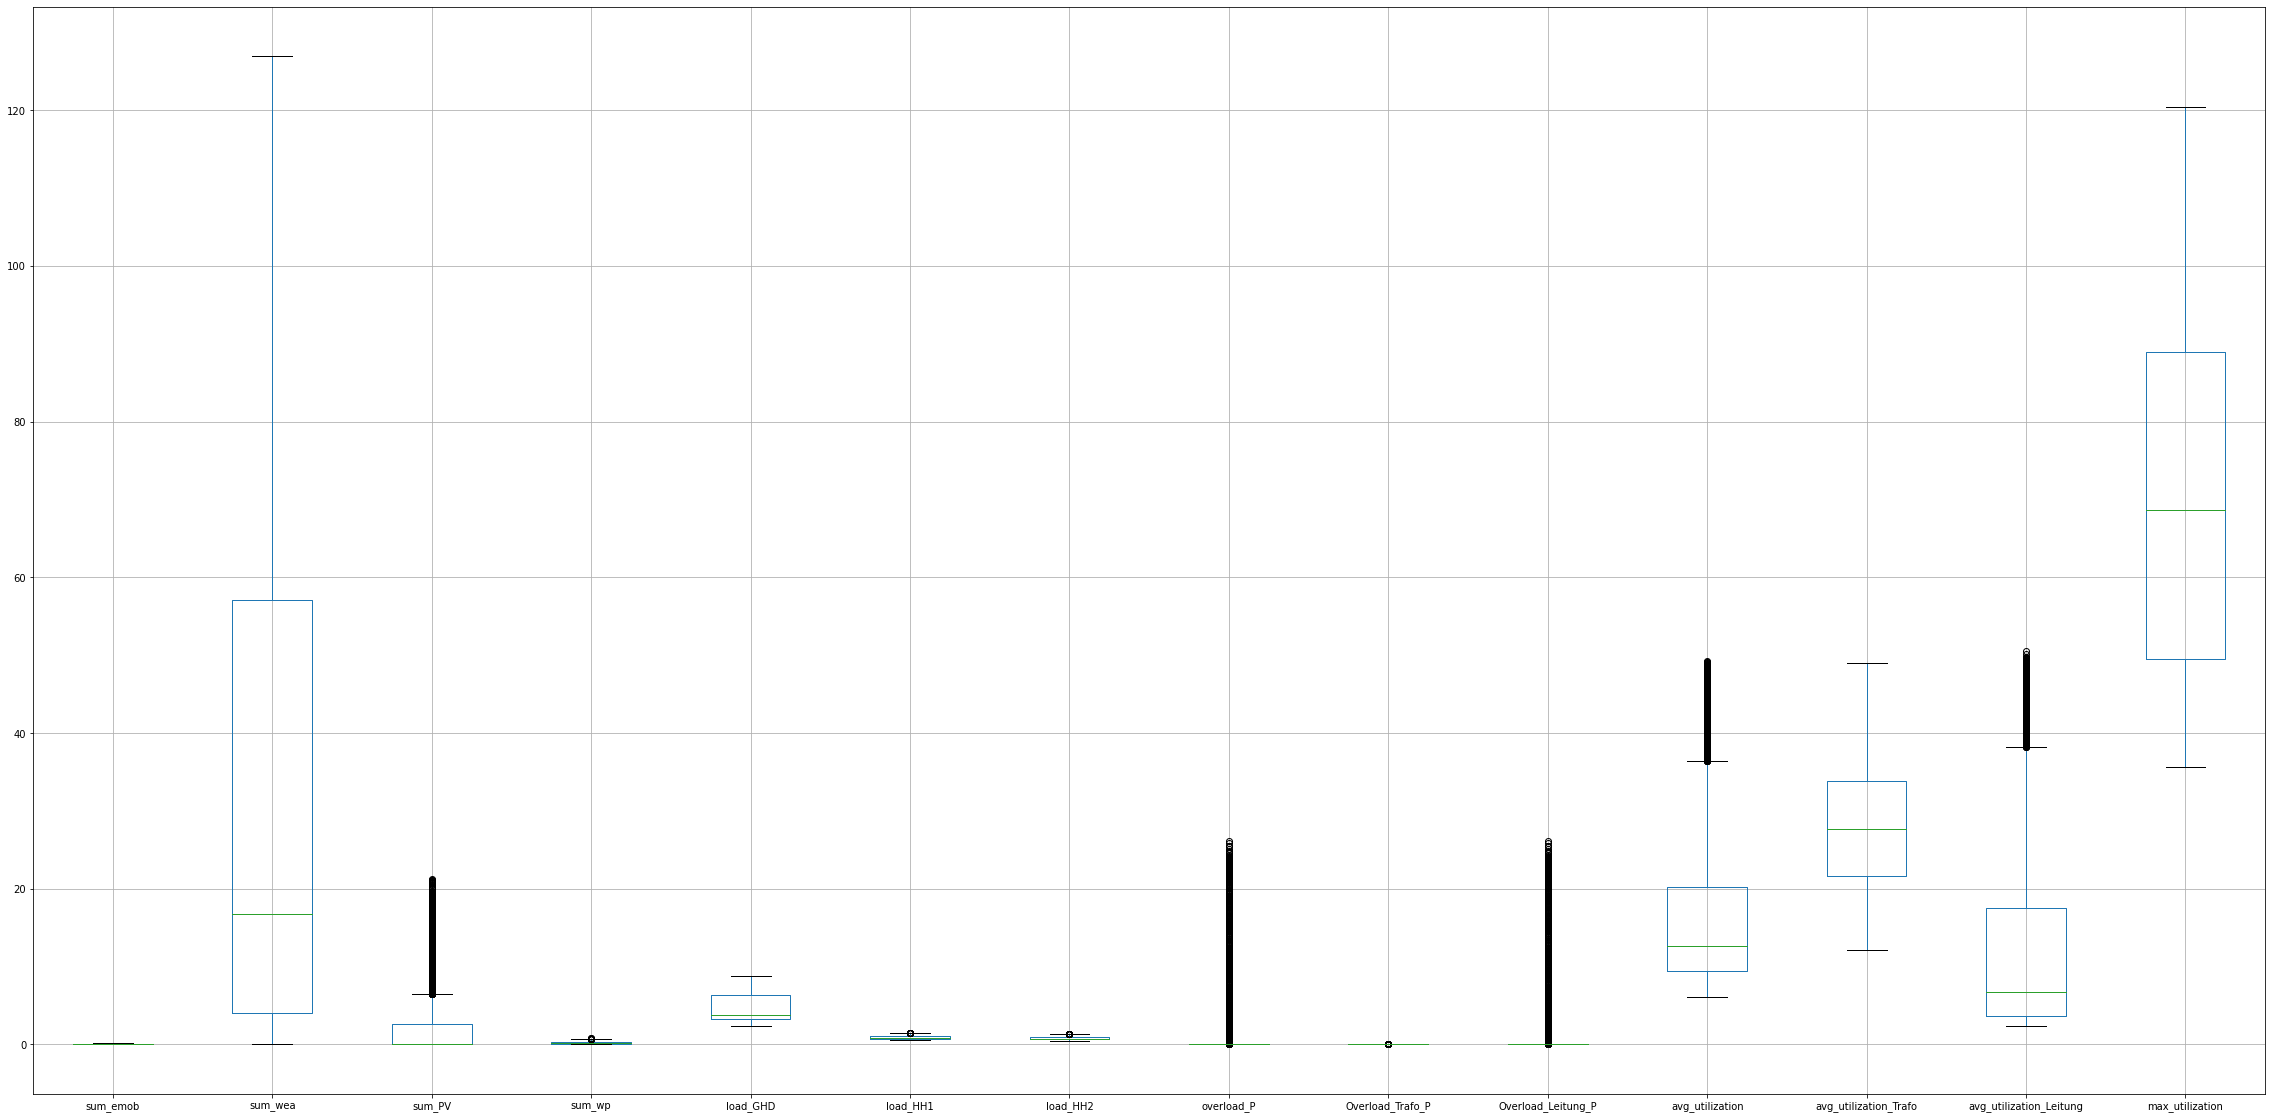

In [ ]:
import matplotlib.pyplot as plt
df_small.drop(['NNF','year','month','day','hour','weekday','workhour'],axis=1).boxplot(widths=0.5,
                 figsize=(40,20))

### Feature Importance

#### Correlation analysis


In [ ]:
# print correlations for price_actual in the Time series (TS) training set
correlations= df_small.corr(method='pearson')
print(correlations['overload_P'].sort_values(ascending=False).to_string()+"\n")
print(correlations['avg_utilization'].sort_values(ascending=False).to_string())


overload_P                 1.000000
Overload_Leitung_P         0.999999
avg_utilization            0.612756
avg_utilization_Leitung    0.612403
sum_wea                    0.525677
max_utilization            0.457514
sum_wp                     0.183016
avg_utilization_Trafo      0.166224
workhour                   0.095608
load_GHD                   0.086194
Overload_Trafo_P           0.070072
month                      0.047820
weekday                    0.042771
NNF                        0.039151
hour                       0.015929
load_HH2                   0.002386
sum_emob                   0.002189
load_HH1                   0.001066
sum_PV                    -0.002827
day                       -0.107048
year                            NaN

avg_utilization            1.000000
avg_utilization_Leitung    0.984696
sum_wea                    0.960241
max_utilization            0.756126
overload_P                 0.612756
Overload_Leitung_P         0.612635
avg_utilization_Trafo      

,sum_emob,sum_wea,sum_PV,sum_wp,load_GHD,load_HH1,load_HH2,overload_P,Overload_Trafo_P,Overload_Leitung_P,avg_utilization,avg_utilization_Trafo,avg_utilization_Leitung,max_utilization
sum_emob,1.000000,0.006837,-0.010436,-0.110237,0.064975,0.538064,0.538579,0.002189,0.038731,0.002149,0.054673,0.286824,0.005929,0.173897
sum_wea,0.006837,1.000000,0.056225,0.119445,0.160091,-0.000389,0.002061,0.525677,0.101944,0.525610,0.960241,0.274348,0.981155,0.627136
sum_PV,-0.010436,0.056225,1.000000,-0.366499,0.417101,-0.071327,-0.072308,-0.002827,-0.025059,-0.002802,0.093500,0.023126,0.109224,0.300936
sum_wp,-0.110237,0.119445,-0.366499,1.000000,-0.029569,-0.021037,-0.021935,0.183016,0.150960,0.182876,0.143751,0.188861,0.113040,0.092766
load_GHD,0.064975,0.160091,0.417101,-0.029569,1.000000,0.025906,0.025463,0.086194,0.375596,0.085818,0.312816,0.856497,0.185729,0.700205
load_HH1,0.538064,-0.000389,-0.071327,-0.021037,0.025906,1.000000,0.998159,0.001066,-0.067619,0.001134,0.071535,0.361346,0.006231,0.133181
load_HH2,0.538579,0.002061,-0.072308,-0.021935,0.025463,0.998159,1.000000,0.002386,-0.067078,0.002454,0.073504,0.361377,0.008324,0.133583
overload_P,0.002189,0.525677,-0.002827,0.183016,0.086194,0.001066,0.002386,1.000000,0.070072,0.999999,0.612756,0.166224,0.612403,0.457514
Overload_Trafo_P,0.038731,0.101944,-0.025059,0.150960,0.375596,-0.067619,-0.067078,0.070072,1.000000,0.069060,0.161398,0.387323,0.103047,0.318676
Overload_Leitung_P,0.002149,0.525610,-0.002802,0.182876,0.085818,0.001134,0.002454,0.999999,0.069060,1.000000,0.612635,0.165842,0.612341,0.457222


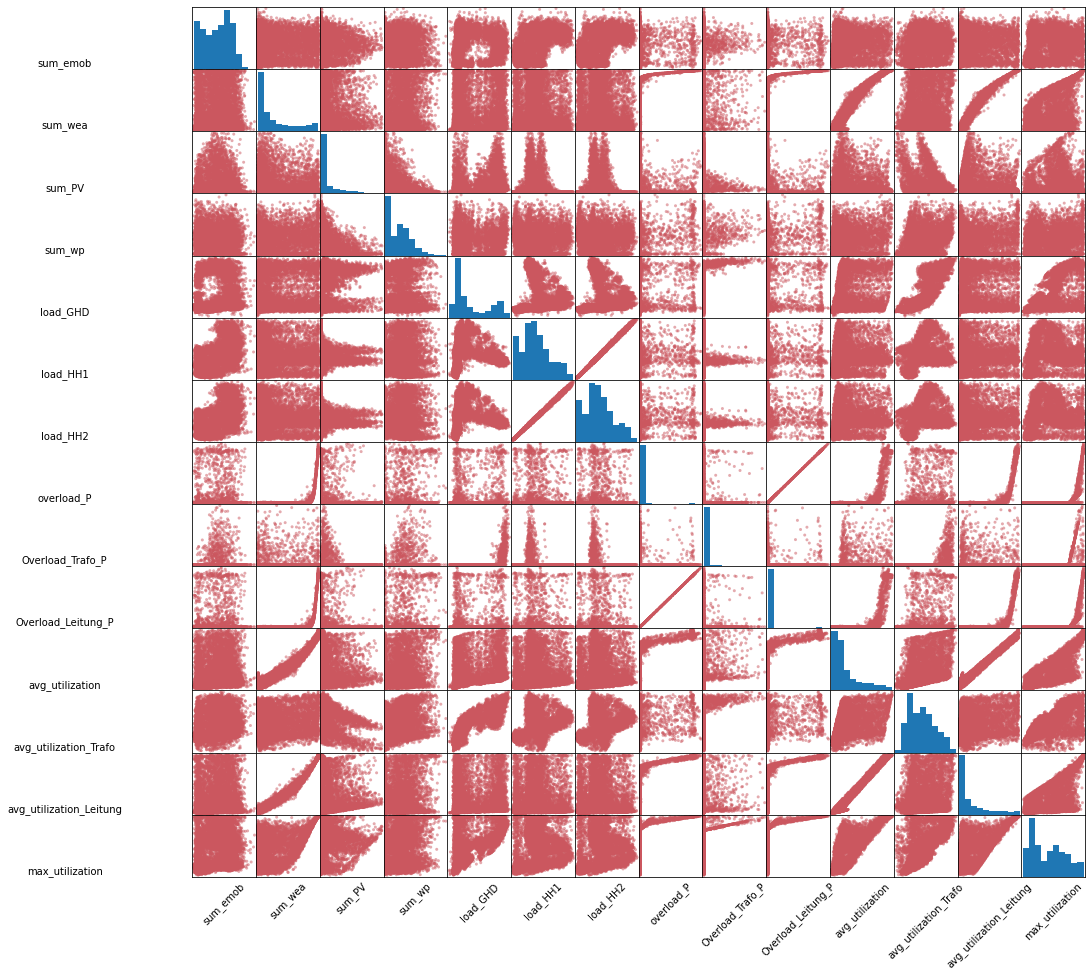

In [ ]:

# dataset for correlation matrix for faster rendering, without the time values
df_scatter = df_small.drop(['NNF','year','month','day','hour','weekday','workhour'],axis=1)

scatter =scatter_matrix(df_scatter,
                        alpha=0.5,
                        figsize=(16,16),
                        color='#cb575f');

# change label rotation
[s.xaxis.label.set_rotation(45) for s in scatter.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in scatter.reshape(-1)]

# hide all ticks
[s.set_xticks(()) for s in scatter.reshape(-1)]
[s.set_yticks(()) for s in scatter.reshape(-1)]

# offset label to prevent overlap of figure
[s.get_yaxis().set_label_coords(-2,0) for s in scatter.reshape(-1)]

# print correlation matrix
df_scatter.corr()

#### XGBoost Feature Importance analysis

In [ ]:
# create test and training dataset as well as validation set
train_end_idx = round(8760 * 0.8) 
valid_end_idx = round(8760 * 0.9) 
test_end_idx = 8760

df_small_train = df_small[:train_end_idx]
df_small_valid = df_small[train_end_idx : valid_end_idx]
df_small_test = df_small[valid_end_idx:]

print('Indices:',
      train_end_idx,
      valid_end_idx,
      test_end_idx)

print('\ndf_small_train has ' + str(len(df_small_train)) + ' rows.')
print('df_small_test has ' + str(len(df_small_valid)) + ' rows.')
print('df_small_valid has ' + str(len(df_small_test)) + ' rows.\n')

############### For overload_P ######################

## create training and test data: response y
#y_train = df_small_train['overload_P'].values
#y_valid = df_small_valid['overload_P'].values
#y_test = df_small_test['overload_P'].values
#
## reshape response y
#y_train = y_train.reshape(-1, 1)
#y_valid = y_valid.reshape(-1, 1)
#y_test = y_test.reshape(-1, 1)
#
## create training and test data: feature matrix X (without response)
#X_train = df_small_train.drop(['overload_P', 'Overload_Leitung_P'], axis=1)
#X_test = df_small_test.drop(['overload_P', 'Overload_Leitung_P'], axis=1)
#X_valid = df_small_valid.drop(['overload_P', 'Overload_Leitung_P'], axis=1)


############### For avg_utilization ######################

## create training and test data: response y
#y_train = df_small_train['avg_utilization'].values
#y_valid = df_small_valid['avg_utilization'].values
#y_test = df_small_test['avg_utilization'].values
#
## reshape response y
#y_train = y_train.reshape(-1, 1)
#y_valid = y_valid.reshape(-1, 1)
#y_test = y_test.reshape(-1, 1)
#
## create training and test data: feature matrix X (without response and response forecast)
#X_train = df_small_train.drop(['avg_utilization', 'avg_utilization_Leitung', 'avg_utilization_Trafo'], axis=1)
#X_test = df_small_test.drop(['avg_utilization', 'avg_utilization_Leitung', 'avg_utilization_Trafo'], axis=1)
#X_valid = df_small_valid.drop(['avg_utilization', 'avg_utilization_Leitung','avg_utilization_Trafo'], axis=1)


############### For max_utilization ######################

# create training and test data: response y
y_train = df_small_train['max_utilization'].values
y_valid = df_small_valid['max_utilization'].values
y_test = df_small_test['max_utilization'].values

# reshape response y
y_train = y_train.reshape(-1, 1)
y_valid = y_valid.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# create training and test data: feature matrix X (without response and response forecast)
X_train = df_small_train.drop(['max_utilization','Overload_Leitung_P','Overload_Trafo_P'], axis=1)
X_test = df_small_test.drop(['max_utilization','Overload_Leitung_P','Overload_Trafo_P'], axis=1)
X_valid = df_small_valid.drop(['max_utilization','Overload_Leitung_P','Overload_Trafo_P'], axis=1)

# get names of feature columns
names = X_train.columns.values

print(names,
      type(names))

Indices: 7008 7884 8760

df_small_train has 7008 rows.
df_small_test has 876 rows.
df_small_valid has 876 rows.

['NNF' 'year' 'month' 'day' 'hour' 'workhour' 'weekday' 'sum_emob'
 'sum_wea' 'sum_PV' 'sum_wp' 'load_GHD' 'load_HH1' 'load_HH2' 'overload_P'
 'avg_utilization' 'avg_utilization_Trafo' 'avg_utilization_Leitung'] <class 'numpy.ndarray'>


In [ ]:
################ Feature scaling: DEPENDS ON CLUSTERING TASK
#
# required: Definition of distance measures:
# Euclidian distance: Feature scaling: Standardization
# Correlation based distancce: MinMaxScaler

################ Find out distribution of data



import scipy.stats as st
def get_best_distribution(data):
    dist_names = ['weibull_min','norm','weibull_max','beta',
              'invgauss','uniform','gamma','expon',   
              'lognorm','pearson3','triang']
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]



## define feature scalers
#scaler_price = MinMaxScaler(feature_range=(0, 1))
#scaler_mult = MinMaxScaler(feature_range=(0, 1))
#
## apply scaler to response vector
#scaler_price.fit(y_train)
#scaler_price.transform(y_train)
#scaler_price.transform(y_valid)
#scaler_price.transform(y_test)
#
## apply scaler to feature matrix
#scaler_mult.fit(X_train)
#scaler_mult.transform(X_train)
#scaler_mult.transform(X_valid)
#scaler_mult.transform(X_test)

In [ ]:
######### initialize 1st XGBoost Model

param = {'eta': 0.01, 
         'max_depth': 1, 
         'subsample': 1.0, 
         'colsample_bytree': 0.80, 
         'alpha': 1.5, 
         'lambda': 1.5, 
         'gamma': 1.5,
         'objective': 'reg:squarederror', 
         'eval_metric': 'rmse', 
         'silent': 1, 
         'min_child_weight': 5, 
         'n_jobs': -1}

# create DMatrix object for training data
dtrain = xgb.DMatrix(X_train, 
                     y_train, 
                     feature_names = X_train.columns.values)

# create DMatrix object for validation data
dtest = xgb.DMatrix(X_valid, 
                    y_valid, 
                    feature_names = X_valid.columns.values)

eval_list = [(dtrain, 'train'), (dtest, 'eval')]

xgb_model = xgb.train(param, dtrain, 100, eval_list)


[0]	train-rmse:71.6409	eval-rmse:70.7604
[1]	train-rmse:70.9651	eval-rmse:70.0572
[2]	train-rmse:70.2961	eval-rmse:69.4026
[3]	train-rmse:69.6341	eval-rmse:68.7563
[4]	train-rmse:68.9791	eval-rmse:68.1152
[5]	train-rmse:68.3315	eval-rmse:67.4808
[6]	train-rmse:67.6894	eval-rmse:66.8118
[7]	train-rmse:67.0543	eval-rmse:66.1916
[8]	train-rmse:66.4258	eval-rmse:65.5764
[9]	train-rmse:65.8034	eval-rmse:64.9263
[10]	train-rmse:65.1877	eval-rmse:64.3237
[11]	train-rmse:64.578	eval-rmse:63.6937
[12]	train-rmse:63.9747	eval-rmse:63.0631
[13]	train-rmse:63.3776	eval-rmse:62.479
[14]	train-rmse:62.7866	eval-rmse:61.9019
[15]	train-rmse:62.2017	eval-rmse:61.2968
[16]	train-rmse:61.6227	eval-rmse:60.7306
[17]	train-rmse:61.0497	eval-rmse:60.1332
[18]	train-rmse:60.4826	eval-rmse:59.5779
[19]	train-rmse:59.9216	eval-rmse:58.9926
[20]	train-rmse:59.3657	eval-rmse:58.4493
[21]	train-rmse:58.8158	eval-rmse:57.9119
[22]	train-rmse:58.2715	eval-rmse:57.3805
[23]	train-rmse:57.7329	eval-rmse:56.8176
[24]

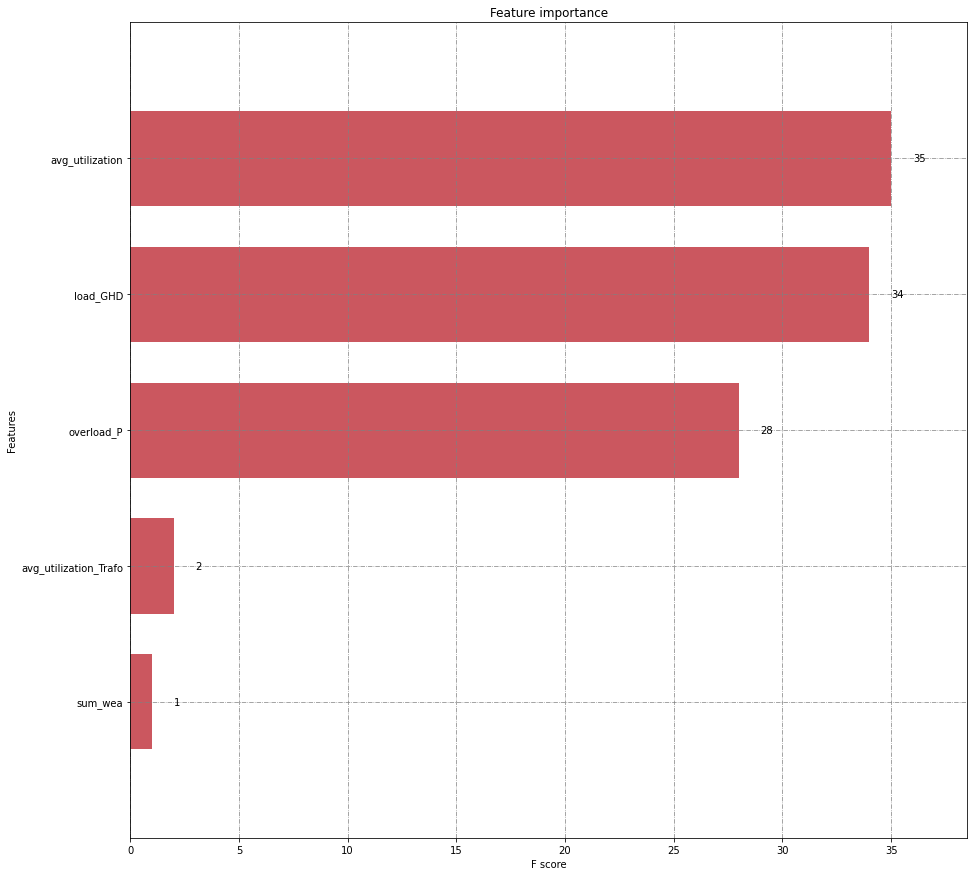

In [ ]:
# plot the XGB importance values
fig_xgb, ax_xgb = plt.subplots(figsize=(15, 15))
xgb.plot_importance(xgb_model, max_num_features=70, height=0.7, ax=ax_xgb, color='#cb575f')

# design plotting area
ax_xgb.set_facecolor('white')
ax_xgb.grid(color='grey', linestyle='-.', linewidth=0.7)
plt.show()

In [ ]:
######### initialize 2nd XGBoost Model

param = {'eta': 0.05, 
         'max_depth': 2, 
         'subsample': 1.0, 
         'colsample_bytree': 0.80, 
         'alpha': 1.5, 
         'lambda': 1.5, 
         'gamma': 1.5,
         'objective': 'reg:linear', 
         'eval_metric': 'rmse', 
         'silent': 1, 
         'min_child_weight': 5, 
         'n_jobs': -1}

# create DMatrix object for training data
dtrain = xgb.DMatrix(X_train, 
                     y_train, 
                     feature_names = X_train.columns.values)

# create DMatrix object for validation data
dtest = xgb.DMatrix(X_valid, 
                    y_valid, 
                    feature_names = X_valid.columns.values)
eval_list = [(dtrain, 'train'), (dtest, 'eval')]

xgb_model2 = xgb.train(param, dtrain, 100, eval_list)




[0]	train-rmse:68.8256	eval-rmse:68.0592
[1]	train-rmse:65.4793	eval-rmse:64.5825
[2]	train-rmse:62.2951	eval-rmse:61.4179
[3]	train-rmse:59.3144	eval-rmse:58.6774
[4]	train-rmse:56.4716	eval-rmse:55.9187
[5]	train-rmse:53.7588	eval-rmse:53.1373
[6]	train-rmse:51.1684	eval-rmse:50.5821
[7]	train-rmse:48.7364	eval-rmse:48.2436
[8]	train-rmse:46.4148	eval-rmse:45.8623
[9]	train-rmse:44.1906	eval-rmse:43.624
[10]	train-rmse:42.1016	eval-rmse:41.4942
[11]	train-rmse:40.0991	eval-rmse:39.4599
[12]	train-rmse:38.2006	eval-rmse:37.5461
[13]	train-rmse:36.3947	eval-rmse:35.7492
[14]	train-rmse:34.6891	eval-rmse:34.0769
[15]	train-rmse:33.0647	eval-rmse:32.3483
[16]	train-rmse:31.5243	eval-rmse:30.8213
[17]	train-rmse:30.071	eval-rmse:29.3976
[18]	train-rmse:28.6815	eval-rmse:28.0046
[19]	train-rmse:27.3669	eval-rmse:26.6812
[20]	train-rmse:26.123	eval-rmse:25.4362
[21]	train-rmse:24.95	eval-rmse:24.2851
[22]	train-rmse:23.8302	eval-rmse:23.1583
[23]	train-rmse:22.7633	eval-rmse:22.1147
[24]	tr

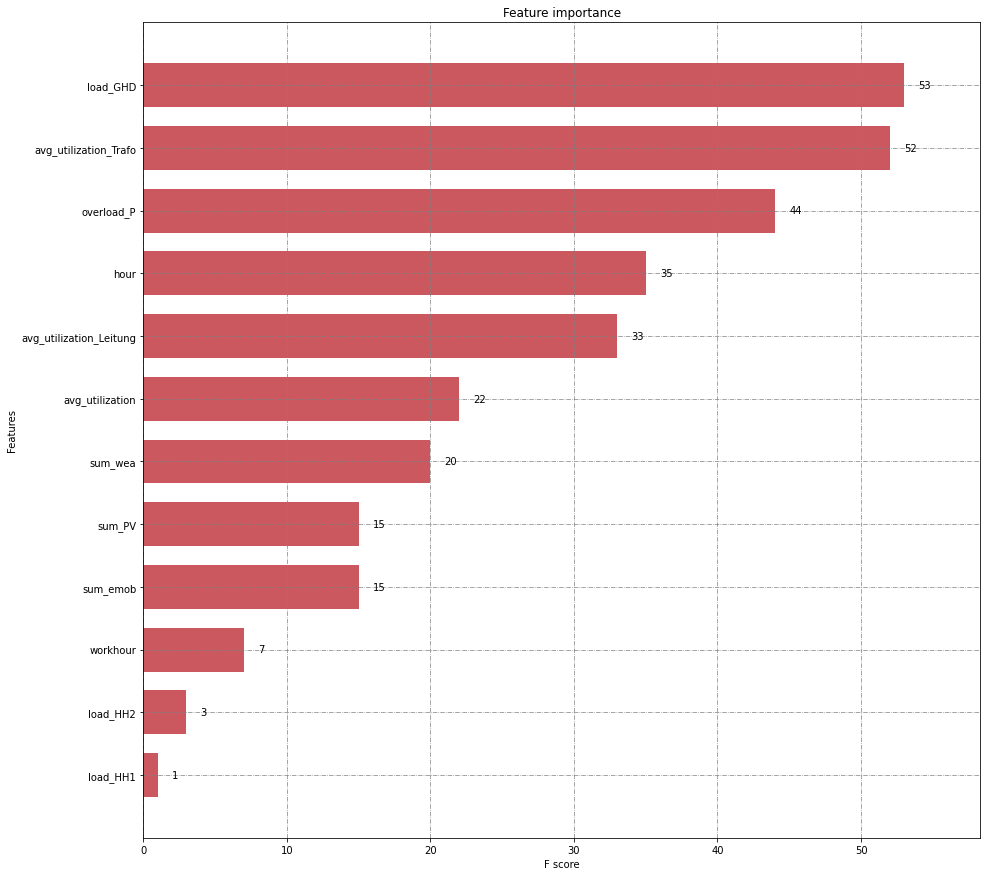

In [ ]:
# plot the XGB importance values
fig_xgb, ax_xgb = plt.subplots(figsize=(15, 15))
xgb.plot_importance(xgb_model2, max_num_features=70, height=0.7, ax=ax_xgb, color='#cb575f')

# design plotting area
ax_xgb.set_facecolor('white')
ax_xgb.grid(color='grey', linestyle='-.', linewidth=0.7)
plt.show()

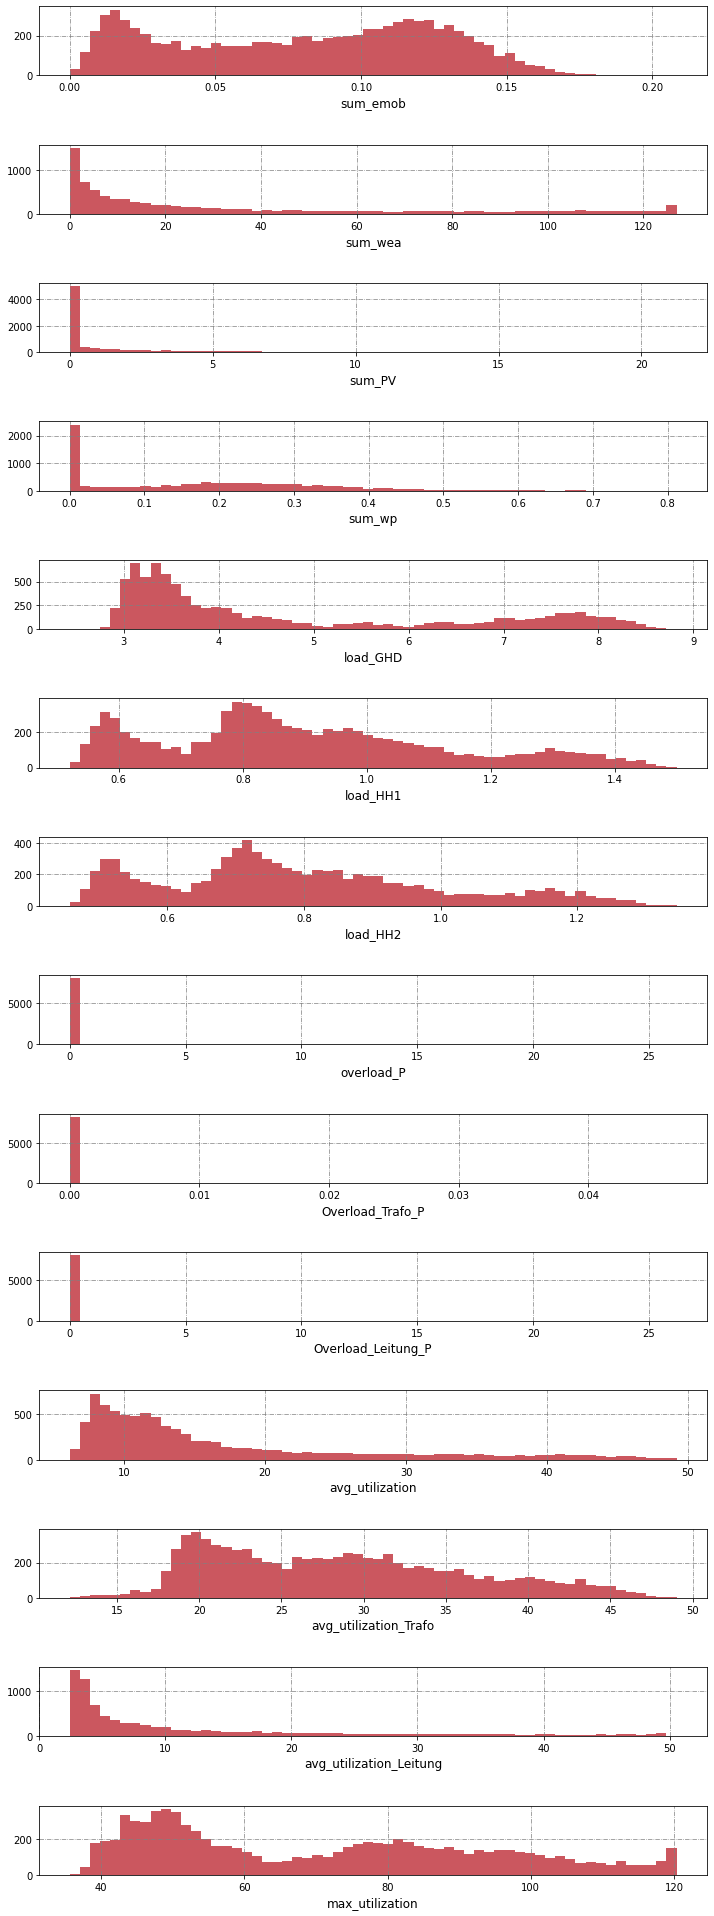

sum_emob


/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


Best fitting distribution: exponweib
Best p value: 2.4105238368005244e-19
Parameters for the best fit: (0.13522945914375895, 8.35860151750772, -3.534813833893702e-05, 0.14717148625182397)


sum_wea


/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


Best fitting distribution: exponweib
Best p value: 4.662138070084154e-55
Parameters for the best fit: (0.7649747608599106, 0.8021057727294829, -2.508202366399769e-28, 47.13003047605137)


sum_PV


/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Best fitting distribution: pareto
Best p value: 9.79772935051828e-296
Parameters for the best fit: (0.14621546035413246, -8.43837524917223e-05, 1.88176122446839e-05)


sum_wp
Best fitting distribution: norm
Best p value: 7.175426824842442e-125
Parameters for the best fit: (0.1776483904109589, 0.1557165076595388)


load_GHD
Best fitting distribution: exponweib
Best p value: 2.5178057611855145e-137
Parameters for the best fit: (1.8855637757488743, 0.9801138997986872, 2.4282848479120185, 1.564537690277868)


load_HH1
Best fitting distribution: weibull_max
Best p value: 6.0277300072975164e-18
Parameters for the best fit: (11.302282696288026, 3.011698298451413, 2.2138055655250923)


load_HH2
Best fitting distribution: exponweib
Best p value: 2.6188786016673225e-16
Parameters for the best fit: (0.4560339602581074, 2.798042273014768, 0.4568190517485362, 0.5228575653340797)


overload_P
Best fitting distribution: norm
Best p value: 0.0
Parameters for the best fit: (0.8601326404365706, 3.767361

In [ ]:
import scipy.stats as st
def get_best_distribution(data):
    '''Function that determines the best fitting distribution for given data histogram'''
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", 
                  'gamma', 'beta', 'rayleigh', 'norm', 'pareto']
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        #print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

###########################################################


fig, ax  = plt.subplots(figsize=(10, 40))   

# plot histogram of all features
datalist = df_small.values
fig.tight_layout()
plt.subplots_adjust(left=None, 
                bottom=None, 
                right=None, 
                top=None, 
                wspace=1, 
                hspace=1)

for column in range(7,datalist.shape[1]):
    ax = plt.subplot(datalist.shape[1], 1, column+1)
    ax.set_facecolor('white')
    ax.set_xlabel(df_small.columns[column], fontsize=12)
    ax.grid(color='grey', linestyle='-.', linewidth=0.7)
    plt.hist(datalist[:, column], bins=60, color='#cb575f')         
plt.show()


# calculate and display best fitting distributions
for column in df_small.drop(['NNF','year','month','day','hour','weekday','workhour'], axis=1): 
    # Select column contents by column name using [] operator
    print(column)
    data = df_small[column]
    best_fit_name, best_fit_params , params = get_best_distribution(data)
    best_dist = getattr(st, best_fit_name)
    print('\n')
   
          
#best_fit_name, best_fit_params = get_best_distribution(data)
#best_dist = getattr(st, best_fit_name)




In [ ]:
#### DATA SCALING: STANDARDIZATION & NORMALIZATION ####

# Get column names first
names = df_small.iloc[:,7:].columns


# Create the Scaler object
std_scaler = preprocessing.StandardScaler()
minmax_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

# Fit your data on the scaler object
np_std = std_scaler.fit_transform(df_small.iloc[:,7:])
np_norm = minmax_scaler.fit_transform(np_std)

# Re-Generate Dataframe with standardized and normalized columns, concatted with the time features
df_scaled = pd.concat([df_small.iloc[:,:7], pd.DataFrame(np_norm, columns=names, index=df_small.index)],axis=1)

df_scaled.set_index('NNF',inplace=True)
df_scaled

,year,month,day,hour,workhour,weekday,sum_emob,sum_wea,sum_PV,sum_wp,load_GHD,load_HH1,load_HH2,overload_P,Overload_Trafo_P,Overload_Leitung_P,avg_utilization,avg_utilization_Trafo,avg_utilization_Leitung,max_utilization
NNF,,,,,,,,,,,,,,,,,,,,
1,2012,1,1,1,0.0,1.0,0.000000,0.839992,0.0,0.000000,0.130864,0.323696,0.311879,0.000000,0.0,0.000000,0.623068,0.298897,0.693394,0.712853
2,2012,1,1,2,0.0,1.0,0.008642,0.887094,0.0,0.145233,0.106404,0.257263,0.240460,0.027447,0.0,0.027447,0.695460,0.305358,0.774885,0.789545
3,2012,1,1,3,0.0,1.0,0.019820,0.964818,0.0,0.310421,0.094802,0.128009,0.122861,0.529847,0.0,0.529847,0.812011,0.292638,0.911739,0.933546
4,2012,1,1,4,0.0,1.0,0.044882,0.955232,0.0,0.390244,0.116295,0.069721,0.077441,0.449579,0.0,0.449579,0.805701,0.293492,0.904946,0.923439
5,2012,1,1,5,0.0,1.0,0.012315,0.961453,0.0,0.349224,0.110934,0.056607,0.059679,0.488775,0.0,0.488775,0.806861,0.272876,0.910837,0.924890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,2012,12,30,20,0.0,1.0,0.608845,0.052097,0.0,0.376940,0.205218,0.562199,0.558230,0.000000,0.0,0.000000,0.068878,0.411879,0.020657,0.248264
8757,2012,12,30,21,0.0,1.0,0.595113,0.049847,0.0,0.389135,0.196912,0.608158,0.606827,0.000000,0.0,0.000000,0.071337,0.425748,0.020213,0.236245
8758,2012,12,30,22,0.0,1.0,0.582131,0.046623,0.0,0.185144,0.174598,0.564724,0.543934,0.000000,0.0,0.000000,0.062167,0.397289,0.016281,0.180190


In [ ]:
#### TIME SERIES SPLIT ####

# Create pandas series with the requested clustering feature.
series = df_scaled["max_utilization"]

#split time series dataframe into equally sized chunks
def split_dataframe(df, chunk_size): 
    '''Function that splits a time series dataframe into equally sized chunks as np array'''
    chunks = list()
    num_chunks = len(df) // chunk_size + 1
    
    for i in range(num_chunks):
        chunk = df[i*chunk_size:(i+1)*chunk_size]
        chunk.reset_index(drop=True, inplace=True)
        chunks.append(chunk)
    return chunks



# return dataframe of concatted splitted series (except for last list item, only contains NaN)
# choose chunk size!

df_dtw = pd.concat(split_dataframe(series, chunk_size = 4)\
                   [:-1],axis=1).astype(float)

df_dtw.columns = [f'max_utilization_'+ str(i[0]) for i in enumerate(df_dtw.columns,1)]
#df_dtw.rename(columns=lambda x: str(x) + str(i for i in enumerate(df_dtw.columns, 1)), inplace=True)
df_dtw

,max_utilization_1,max_utilization_2,max_utilization_3,max_utilization_4,max_utilization_5,max_utilization_6,max_utilization_7,max_utilization_8,max_utilization_9,max_utilization_10,max_utilization_11,max_utilization_12,max_utilization_13,max_utilization_14,max_utilization_15,max_utilization_16,max_utilization_17,max_utilization_18,max_utilization_19,max_utilization_20,max_utilization_21,max_utilization_22,max_utilization_23,max_utilization_24,max_utilization_25,max_utilization_26,max_utilization_27,max_utilization_28,max_utilization_29,max_utilization_30,max_utilization_31,max_utilization_32,max_utilization_33,max_utilization_34,max_utilization_35,max_utilization_36,max_utilization_37,max_utilization_38,max_utilization_39,max_utilization_40,...,max_utilization_2151,max_utilization_2152,max_utilization_2153,max_utilization_2154,max_utilization_2155,max_utilization_2156,max_utilization_2157,max_utilization_2158,max_utilization_2159,max_utilization_2160,max_utilization_2161,max_utilization_2162,max_utilization_2163,max_utilization_2164,max_utilization_2165,max_utilization_2166,max_utilization_2167,max_utilization_2168,max_utilization_2169,max_utilization_2170,max_utilization_2171,max_utilization_2172,max_utilization_2173,max_utilization_2174,max_utilization_2175,max_utilization_2176,max_utilization_2177,max_utilization_2178,max_utilization_2179,max_utilization_2180,max_utilization_2181,max_utilization_2182,max_utilization_2183,max_utilization_2184,max_utilization_2185,max_utilization_2186,max_utilization_2187,max_utilization_2188,max_utilization_2189,max_utilization_2190
0,0.712853,0.924890,0.951755,0.797135,0.661002,0.401139,0.362145,0.454052,0.490994,0.628871,0.663776,0.314433,0.184369,0.101730,0.210794,0.597916,0.639755,0.290471,0.192132,0.091806,0.158833,0.246615,0.290021,0.287052,0.216539,0.127889,0.659690,0.792891,0.609035,0.336745,0.191268,0.691195,0.761012,0.912433,0.633699,0.385719,0.184752,0.124164,0.696051,0.841901,...,0.627844,0.753434,0.635905,0.788050,0.922971,0.856071,0.663029,0.745976,0.407220,0.330225,0.167178,0.150054,0.594845,0.216477,0.259411,0.288647,0.167705,0.106851,0.539924,0.796674,0.695214,0.458547,0.708830,0.919523,0.988640,0.974991,0.895949,0.871128,0.851016,0.947659,0.530894,0.875695,0.758537,0.597019,0.174352,0.085753,0.147513,0.150865,0.250470,0.236245
1,0.789545,0.955557,0.869169,0.835235,0.610909,0.401316,0.361685,0.410588,0.556902,0.638664,0.611736,0.337059,0.274935,0.101845,0.404712,0.531175,0.529392,0.196419,0.185830,0.041447,0.109262,0.195629,0.269043,0.214515,0.244597,0.152823,0.705868,0.815937,0.647489,0.255059,0.346515,0.743590,0.772457,0.913288,0.647036,0.274714,0.648270,0.201703,0.774732,0.891751,...,0.652207,0.703020,0.506925,0.899682,0.879427,0.891747,0.640635,0.676575,0.331525,0.336829,0.268065,0.271923,0.358691,0.183923,0.257354,0.210111,0.206482,0.132941,0.537396,0.797769,0.701830,0.362124,0.759459,0.975691,0.988127,0.980252,0.921755,0.780919,0.859998,0.966586,0.343997,0.851587,0.709985,0.417668,0.202612,0.111348,0.161884,0.191269,0.248518,0.180190
2,0.933546,0.977930,0.799856,0.740252,0.501655,0.403655,0.342261,0.303834,0.565417,0.510518,0.551474,0.227693,0.155292,0.139700,0.578416,0.531898,0.462863,0.175988,0.112768,0.087221,0.187986,0.231442,0.330743,0.192681,0.172602,0.299938,0.796697,0.871261,0.643615,0.208772,0.366914,0.641515,0.827471,0.861718,0.646705,0.247588,0.942372,0.287528,0.823190,0.874593,...,0.688924,0.721334,0.601981,0.936403,0.816564,0.868338,0.781567,0.433973,0.277782,0.268106,0.207849,0.295941,0.392267,0.239378,0.330451,0.174230,0.116407,0.232840,0.616328,0.730462,0.627017,0.484778,0.866861,0.981092,0.975841,0.944534,0.931634,0.901819,0.881115,0.920510,0.585199,0.576541,0.688307,0.341496,0.110001,0.152722,0.165410,0.265065,0.267275,0.142203
3,0.923439,0.978878,0.809378,0.606896,0.414463,0.308391,0.417769,0.376225,0.582538,0.503840,0.500467,0.180229,0.083136,0.159211,0.552025,0.517718,0.388823,0.150734,0.084646,0.157519,0.190889,0.196071,0.291888,0.141179,0.113155

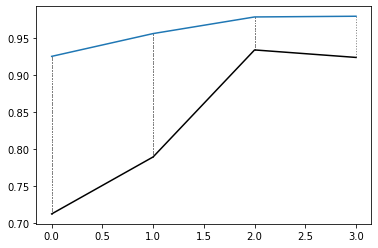

In [ ]:
#### DYNAMIC TIME WARPING ###

# displaying the functionality of dynamic time warping

dtw(
    df_dtw.iloc[:, 0],
    df_dtw.iloc[:, 1],
    keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(2, "b")).plot(type="twoway")

In [ ]:
def get_dtw_diff_matrix(cols:list):
    """
    From a list of column names referring to a pandas dataframe with series as columns, 
    compute a distance matrix by computing the DTW distance of all pairwise combinations of series. 
    I take the column names as input so it does reduce the complexity when indexing.
    """
    diff_matrix = {}

    cross = itertools.product(cols, cols)
    for (col1, col2) in cross:
        series1 = df_dtw[col1]
        series2 = df_dtw[col2]
        #print(series1,series2)
        # measure difference dtw
        diff = dtw(series1, 
                   series2, 
                   keep_internals=True, 
                   step_pattern=rabinerJuangStepPattern(2, "c")).normalizedDistance
        diff_matrix[(col1 , col2)] = [diff]
        
    # convert to pandas dataframe    
    dtw_diff_df = pd.DataFrame(diff_matrix).T.reset_index()\
      .rename(columns = {"level_0":"max_utilization1", "level_1":"max_utilization2", 0:"diff"})\
      .pivot_table(index = "max_utilization1", columns = "max_utilization2", values = "diff")
    
    return dtw_diff_df


In [ ]:
#### CLUSTERING DISTANCE MATRIX ####

# get columns sample for testing
random.seed(1)
sample_cols = random.sample(list(df_dtw.columns), 300)

# compute the DTW distance matrix as dataframe
dtw_diff_df = get_dtw_diff_matrix(sample_cols)

dtw_diff_df

max_utilization2,max_utilization_1010,max_utilization_1023,max_utilization_1025,max_utilization_1034,max_utilization_1038,max_utilization_1039,max_utilization_1045,max_utilization_1046,max_utilization_105,max_utilization_1059,max_utilization_1062,max_utilization_1091,max_utilization_1092,max_utilization_1093,max_utilization_1098,max_utilization_1101,max_utilization_1103,max_utilization_1118,max_utilization_112,max_utilization_1136,max_utilization_115,max_utilization_1151,max_utilization_1152,max_utilization_1153,max_utilization_1164,max_utilization_117,max_utilization_1187,max_utilization_119,max_utilization_1190,max_utilization_1193,max_utilization_1205,max_utilization_1207,max_utilization_1211,max_utilization_1212,max_utilization_1213,max_utilization_1215,max_utilization_122,max_utilization_1221,max_utilization_1224,max_utilization_1243,...,max_utilization_778,max_utilization_796,max_utilization_816,max_utilization_818,max_utilization_819,max_utilization_821,max_utilization_823,max_utilization_842,max_utilization_843,max_utilization_851,max_utilization_852,max_utilization_857,max_utilization_86,max_utilization_860,max_utilization_869,max_utilization_873,max_utilization_882,max_utilization_888,max_utilization_89,max_utilization_892,max_utilization_897,max_utilization_9,max_utilization_904,max_utilization_909,max_utilization_915,max_utilization_917,max_utilization_92,max_utilization_924,max_utilization_930,max_utilization_938,max_utilization_941,max_utilization_946,max_utilization_951,max_utilization_955,max_utilization_962,max_utilization_964,max_utilization_97,max_utilization_982,max_utilization_989,max_utilization_995
max_utilization1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
max_utilization_1010,0.000000,0.450840,0.243036,0.045525,0.354828,0.111937,0.144290,0.023977,0.095793,0.346467,0.108358,0.327271,0.135426,0.135852,0.587230,0.484978,0.393596,0.040339,0.640007,0.035280,0.142903,0.238716,0.103548,0.116109,0.130841,0.601311,0.331265,0.360851,0.046961,0.254667,0.288481,0.121690,0.339558,0.143653,0.170281,0.723406,0.046929,0.785360,0.113260,0.118072,...,0.181197,0.454395,0.159524,0.068169,0.567547,0.132105,0.132685,0.118502,0.047423,0.257404,0.116780,0.245421,0.536277,0.076915,0.276241,0.350333,0.148393,0.149448,0.423278,0.362551,0.270871,0.371160,0.080707,0.310651,0.317984,0.302409,0.133238,0.121200,0.131919,0.117394,0.253864,0.169337,0.450563,0.128234,0.030262,0.478466,0.151304,0.265896,0.096169,0.273020
max_utilization_1023,0.406824,0.000000,0.212786,0.466847,0.195293,0.494830,0.451506,0.431973,0.445779,0.081631,0.463546,0.156980,0.433986,0.455419,0.146723,0.042778,0.134956,0.462693,0.178353,0.445187,0.453007,0.226942,0.514314,0.503600,0.373884,0.139657,0.142149,0.108797,0.434807,0.217935,0.163400,0.487594,0.125227,0.413115,0.172733,0.261752,0.249474,0.323707,0.451830,0.500908,...,0.430104,0.082890,0.424102,0.330997,0.122929,0.440885,0.454173,0.571829,0.431497,0.180449,0.471033,0.218328,0.109982,0.326454,0.185922,0.099916,0.422432,0.425290,0.083075,0.141560,0.139179,0.087945,0.379438,0.109732,0.085449,0.172442,0.162272,0.446115,0.408587,0.568336,0.215318,0.441412,0.070108,0.478654,0.447098,0.099131,0.422300,0.214867,0.484302,0.175258
max_utilization_1025,0.213279,0.232877,0.000000,0.223156,0.135714,0.251140,0.207815,0.216257,0.202088,0.163723,0.219855,0.109309,0.190295,0.211728,0.369267,0.267015,0.175633,0.219003,0.422044,0.204086,0.209316,0.020399,0.270623,0.259909,0.130193,0.383348,0.113302,0.142888,0.211247,0.020984,0.070518,0.243903,0.121595,0.169424,0.175145,0.505443,0.220689,0.567398,0.208139,0.257217,...,0.186414,0.236432,0.180411,0.278898,0.349584,0.197194,0.210482,0.328138,0.206945,0.038951,0.227342,0.022336,0.318314,0.317288,0.057788,0.162973,0.178741,0.181599,0.205315,0.144588,0.157552,0.153197,0.154509,0.187941,0.134010,0.084447,0.134380,0.202424,0.164896,0.324645,0.026920,0.197721,0.232600,0.234963,0.215576,0.260503,0.178609,0.047933,0.240611,0.054567
max_utilization_10

In [ ]:
# ward clustering from difference matrix, where distance is Dynamic time warping distance instead of Euclidean
t = ward(dtw_diff_df)

# extract clusters
dtw_clusters = pd.DataFrame({"cluster":fcluster(t, 1.15)}, index = dtw_diff_df.index)

50


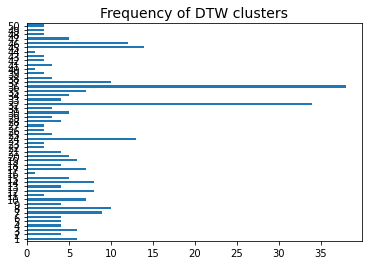

In [ ]:
# plot frequency of clusters

dtw_cluster_series = dtw_clusters.cluster.value_counts().sort_index()
dtw_cluster_series.plot.barh()
plt.title("Frequency of DTW clusters", fontsize = 14)
print(len(dtw_cluster_series.index))

In [ ]:
# #### PLOT SPECIFIC CLUSTERS ####

# # create dataframe for plotting time series in cluster x  
# # choose cluster number to plot

# i = 1

# ################################

# df_plot = df_dtw.T.merge(dtw_clusters.loc[dtw_clusters.cluster == i], 
#                          left_index = True, right_index = True).T
# df_plot.drop(df_plot.tail(1).index,inplace=True)
# df_plot.plot(figsize = (12,4))
# df_plot[f'mean_'+ str(i)]=df_plot.mean(axis=1)
# df_plot=df_plot.drop(df_plot.iloc[:,0:-1],axis=1)
# df_plot 

In [ ]:
#### PLOT ALL CLUSTERS ####

for i in range(len(dtw_cluster_series.index)):
    df_plot = df_dtw.T.merge(dtw_clusters.loc[dtw_clusters.cluster == i+1], 
                             left_index = True, right_index = True).T
    df_plot.drop(df_plot.tail(1).index,inplace=True)
    df_plot.plot(figsize = (12,4))


In [ ]:
#### GET A CLUSTER REPRESENTATIVE/SYNTETICAL FOR EACH CLUSTER ####

# No built in method unfortunately but I have implemented both the medoid'ish as well as means clustering method.
# cluster_medoid gives a REPRESENTATIVE timeseries from the cluster that has the least euclid. distance to all other timeseries from the cluster.
# cluster_mean gives a SYNTETHIC timeseries as the average time series from all time series from within a cluster.

def cluster_mean(df_dtw):
    """ 
    Calculates the mean timeseries from all timeseries within a cluster 
    by averaging every y-value per x-value of the time series
    """ 

    df_mean=pd.DataFrame()
    for i in range(len(dtw_cluster_series.index)):
        df_cluster = df_dtw.T.merge(dtw_clusters.loc[dtw_clusters.cluster == i+1], 
                                 left_index = True, right_index = True).T
        df_mean[f'mean_cluster_'+ str(i+1)]=df_cluster.mean(axis=1)

    # drop last row (only contains cluster number)
    df_mean=df_mean[0:-1]
    
    # plot each cluster representative
    axes = df_mean.plot.line(figsize=(12,160),subplots=True)

    return df_mean 
  

In [ ]:
# Call cluster-mean function and plot the averaged cluster time series

df_mean=cluster_mean(df_dtw)

#fig = plt.figure(figsize=(20,4))

df_mean

,mean_cluster_1,mean_cluster_2,mean_cluster_3,mean_cluster_4,mean_cluster_5,mean_cluster_6,mean_cluster_7,mean_cluster_8,mean_cluster_9,mean_cluster_10,mean_cluster_11,mean_cluster_12,mean_cluster_13,mean_cluster_14,mean_cluster_15,mean_cluster_16,mean_cluster_17,mean_cluster_18,mean_cluster_19,mean_cluster_20,mean_cluster_21,mean_cluster_22,mean_cluster_23,mean_cluster_24,mean_cluster_25,mean_cluster_26,mean_cluster_27,mean_cluster_28,mean_cluster_29,mean_cluster_30,mean_cluster_31,mean_cluster_32,mean_cluster_33,mean_cluster_34,mean_cluster_35,mean_cluster_36,mean_cluster_37,mean_cluster_38,mean_cluster_39,mean_cluster_40,mean_cluster_41,mean_cluster_42,mean_cluster_43,mean_cluster_44,mean_cluster_45,mean_cluster_46,mean_cluster_47,mean_cluster_48,mean_cluster_49,mean_cluster_50
0,0.216138,0.108979,0.191612,0.143487,0.196989,0.159070,0.051630,0.126380,0.128850,0.146302,0.115531,0.059492,0.066973,0.066586,0.078595,0.033517,0.110284,0.127420,0.447110,0.215709,0.187070,0.206829,0.250655,0.250762,0.372484,0.287488,0.299667,0.220015,0.166830,0.314516,0.293594,0.754413,0.987988,0.954455,0.834685,0.483475,0.629460,0.702959,0.638180,0.956814,0.418517,0.289129,0.404695,0.412697,0.570682,0.624352,0.514877,0.522416,0.597535,0.619495
1,0.231326,0.121160,0.175272,0.183584,0.183434,0.221096,0.085231,0.156676,0.134927,0.171502,0.237948,0.061518,0.098021,0.128497,0.180068,0.025204,0.178765,0.263818,0.304974,0.175340,0.145552,0.244964,0.212518,0.211051,0.170725,0.202537,0.253096,0.227700,0.176315,0.240708,0.245692,0.779871,0.986977,0.958446,0.871486,0.433649,0.648652,0.695817,0.652509,0.671731,0.410725,0.510803,0.499281,0.504718,0.550183,0.597617,0.549496,0.576699,0.617009,0.556823
2,0.111464,0.204076,0.123128,0.134320,0.101070,0.106989,0.137405,0.086579,0.133813,0.112549,0.096248,0.105833,0.227912,0.223460,0.240195,0.204349,0.292664,0.389093,0.170027,0.171565,0.180517,0.138981,0.168438,0.171165,0.136815,0.210739,0.154421,0.197806,0.215431,0.213585,0.212992,0.785691,0.978963,0.965301,0.910494,0.411405,0.635729,0.706243,0.689229,0.360349,0.477855,0.685179,0.611222,0.664773,0.525758,0.528631,0.590192,0.627077,0.601437,0.520824
3,0.072238,0.154315,0.108004,0.075221,0.047937,0.071992,0.294196,0.049191,0.088667,0.050170,0.038965,0.090211,0.362472,0.478308,0.500419,0.583825,0.580516,0.448980,0.146026,0.137416,0.181223,0.108213,0.085578,0.124360,0.115261,0.129925,0.144658,0.178970,0.333994,0.138574,0.235050,0.722065,0.973891,0.937244,0.814387,0.394987,0.588693,0.552057,0.755343,0.638747,0.648924,0.639874,0.647027,0.763067,0.452896,0.449163,0.565994,0.619184,0.495342,0.579800


In [ ]:
def cluster_medoid(df_dtw):
    """ 
    Calculates a representative timeseries for each cluster: The timeseries with the least
    aggregate distance to all other timeseries.
    """ 
    # creates empty dataframe for medoid time series of each cluster
    df_medoid=pd.DataFrame()

    for i in range(len(dtw_cluster_series.index)):
        df_cluster = df_dtw.T.merge(dtw_clusters.loc[dtw_clusters.cluster == i+1], 
                                left_index = True, right_index = True).T
        cols = list(df_cluster.columns)

        intercluster_diff_dict = {}
        
        diff = 0

        cross = itertools.product(cols, cols)
        for (col1, col2) in cross:
            series1 = df_cluster[col1]
            series2 = df_cluster[col2]
            #print(diff)
            # calculates pairwise euclidian distance between the time series
            # zip() function creates an iterator which aggregates elements from two or more iterables 
            diff = np.sqrt(np.sum([(a-b)*(a-b) for a, b in zip(series1, series2)]))
            #print(diff)
            intercluster_diff_dict[(col1 , col2)] = [diff]
            
        # convert to pandas dataframe
        intercluster_diff_df = pd.DataFrame(intercluster_diff_dict).T.reset_index().rename(columns = {"level_0":"max_utilization1", "level_1":"max_utilization2", 0:"diff"})\
        .pivot_table(index = "max_utilization1", columns = "max_utilization2", values = "diff")

        # aggregate euclidian distance between one series and every other:
        intercluster_diff_df["diff_sum"] = intercluster_diff_df.sum(axis=0)

        #return index of timeseries that has the smallest intercluster distance to the other timeseries
        index = intercluster_diff_df[["diff_sum"]].idxmin().values[0]

        # return corresponding time series as cluster representative and add it to the medoid timeframe 
        df_medoid[f'medoid_timeseries_cluster_'+ str(i+1)] = df_cluster[index]
    df_medoid=df_medoid[0:-1]

    # plot each cluster representative
    axes = df_medoid.plot.line(figsize=(12,160),subplots=True)

    return df_medoid  


,medoid_timeseries_cluster_1,medoid_timeseries_cluster_2,medoid_timeseries_cluster_3,medoid_timeseries_cluster_4,medoid_timeseries_cluster_5,medoid_timeseries_cluster_6,medoid_timeseries_cluster_7,medoid_timeseries_cluster_8,medoid_timeseries_cluster_9,medoid_timeseries_cluster_10,medoid_timeseries_cluster_11,medoid_timeseries_cluster_12,medoid_timeseries_cluster_13,medoid_timeseries_cluster_14,medoid_timeseries_cluster_15,medoid_timeseries_cluster_16,medoid_timeseries_cluster_17,medoid_timeseries_cluster_18,medoid_timeseries_cluster_19,medoid_timeseries_cluster_20,medoid_timeseries_cluster_21,medoid_timeseries_cluster_22,medoid_timeseries_cluster_23,medoid_timeseries_cluster_24,medoid_timeseries_cluster_25,medoid_timeseries_cluster_26,medoid_timeseries_cluster_27,medoid_timeseries_cluster_28,medoid_timeseries_cluster_29,medoid_timeseries_cluster_30,medoid_timeseries_cluster_31,medoid_timeseries_cluster_32,medoid_timeseries_cluster_33,medoid_timeseries_cluster_34,medoid_timeseries_cluster_35,medoid_timeseries_cluster_36,medoid_timeseries_cluster_37,medoid_timeseries_cluster_38,medoid_timeseries_cluster_39,medoid_timeseries_cluster_40,medoid_timeseries_cluster_41,medoid_timeseries_cluster_42,medoid_timeseries_cluster_43,medoid_timeseries_cluster_44,medoid_timeseries_cluster_45,medoid_timeseries_cluster_46,medoid_timeseries_cluster_47,medoid_timeseries_cluster_48,medoid_timeseries_cluster_49,medoid_timeseries_cluster_50
0,0.222521,0.109167,0.197499,0.159117,0.200515,0.171826,0.043566,0.125934,0.140736,0.144475,0.122434,0.059563,0.066255,0.067001,0.054433,0.033517,0.124164,0.093775,0.402587,0.222571,0.185559,0.224101,0.245007,0.265402,0.379031,0.287052,0.297095,0.215445,0.192174,0.327165,0.318366,0.742838,0.990323,0.966832,0.871871,0.503373,0.669921,0.680039,0.579740,0.956814,0.364767,0.294861,0.403466,0.412697,0.562832,0.613650,0.535220,0.544251,0.616526,0.616702
1,0.241957,0.153754,0.164403,0.189760,0.186089,0.219195,0.077176,0.154283,0.127549,0.168283,0.242758,0.084700,0.104725,0.135027,0.172312,0.025204,0.201703,0.264850,0.297610,0.174990,0.143234,0.236301,0.217840,0.206792,0.147011,0.214515,0.255741,0.217514,0.172835,0.222708,0.278022,0.777902,0.978449,0.954241,0.851876,0.457357,0.654503,0.728906,0.680933,0.671731,0.444440,0.520127,0.521123,0.504718,0.556575,0.594034,0.541867,0.582634,0.591191,0.539058
2,0.112686,0.207176,0.140467,0.121649,0.100798,0.103802,0.132872,0.083290,0.141704,0.108189,0.118218,0.081085,0.226928,0.205094,0.253306,0.204349,0.287528,0.435753,0.162229,0.175181,0.185890,0.131781,0.176542,0.163892,0.155943,0.192681,0.136128,0.195873,0.195105,0.213124,0.207873,0.788425,0.961129,0.951702,0.904057,0.444127,0.622907,0.692725,0.683881,0.360349,0.562095,0.728534,0.625732,0.664773,0.519572,0.547314,0.601892,0.606887,0.584579,0.565141
3,0.054704,0.149595,0.108014,0.063307,0.044651,0.066743,0.311528,0.047707,0.102153,0.056353,0.037505,0.079028,0.387444,0.476389,0.491730,0.583825,0.562681,0.453138,0.143058,0.151937,0.166023,0.102845,0.092187,0.121428,0.153797,0.141179,0.153849,0.199775,0.324714,0.125907,0.199802,0.696544,0.968172,0.954563,0.777623,0.362580,0.619246,0.536493,0.769987,0.638747,0.643540,0.577283,0.640538,0.763067,0.436995,0.469682,0.563744,0.607104,0.511780,0.555441


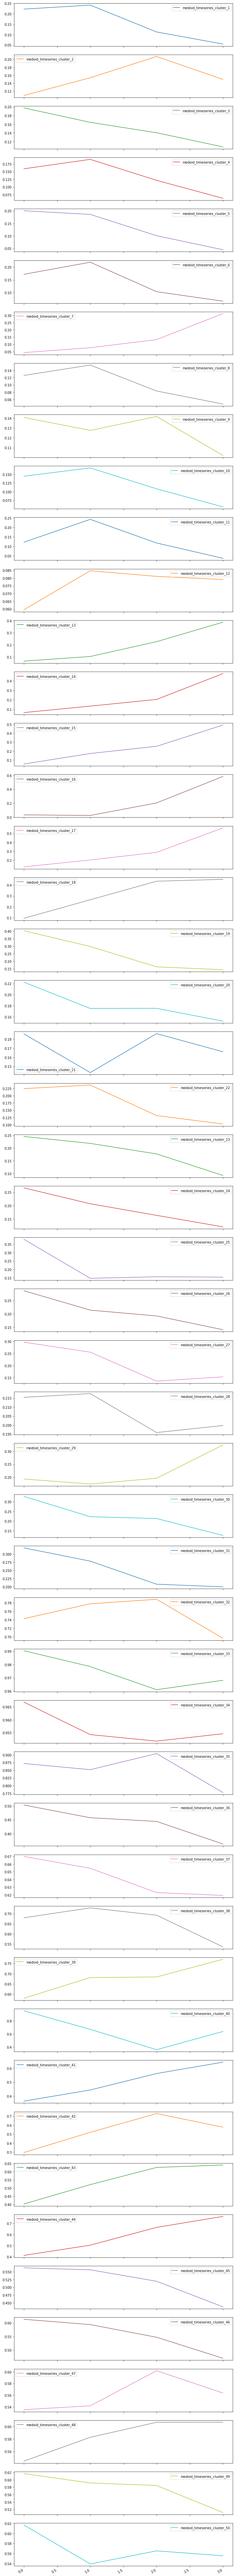

In [ ]:
# Call cluster-medoid function and plot the representative cluster time series
df_medoid=cluster_medoid(df_dtw)
df_medoid

Thats it. Good luck have fun with my code.